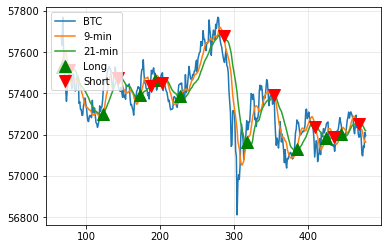

In [1]:
import base64
import json
import os
import urllib
from terminalLogic import Algo
import client
import pandas as pd
from matplotlib import pyplot as plt
import mpld3


def figure():
    df = pd.read_csv('../data/btcperp1m.csv')
    df.drop(df.columns[[0]], axis=1,inplace=True)
    df1 = Algo.fullstate(df, df)
    df1.dropna(inplace=True)
    df2 = df1

    fig, ax = plt.subplots()
    plt.rcParams['figure.figsize'] = 20,8
    plt.grid(True, alpha = .3)
    plt.plot(df2.iloc[-500:]['close'], label = 'BTC')
    plt.plot(df2.iloc[-500:]['9-min'], label = '9-min')
    plt.plot(df2.iloc[-500:]['21-min'], label = '21-min')
    plt.plot(df2[-500:].loc[df2.entry == 2].index, df2[-500:]['9-min'][df2.entry == 2], "^",
            color = "g", markersize = 12, label= "Long")
    plt.plot(df2[-500:].loc[df2.entry == -2].index, df2[-500:]['21-min'][df2.entry == -2], "v",
            color = "r", markersize = 12, label="Short")
    plt.legend(loc=2);
    html_fig = mpld3.fig_to_html(fig, template_type='general')
a = figure()
